# Exploring Decision Tree Classifier

<hr>

### Decision Tree
<b>
The decision tree classifiers organized a series of test questions and conditions in a tree structure. In the decision tree, the root and internal nodes contain attribute test conditions to separate recordes that have different characteristics. All the terminal node is assigned a class lable Yes or No.</b>
<hr>

### Main Question to Solve:
#### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

<hr>

## Import Required Libraries.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\WPy64-3741\python-3.7.4.amd64\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<hr>

### Loading and Reading IRIS Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Insights Form Data

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Check for null values

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### No null values in dataset

<hr>

## Visualizing the dataset

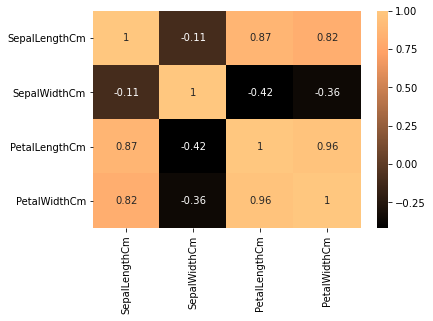

In [6]:
# Plotting Correlation Matrix
df1 = df.drop('Id',1)
sns.heatmap(df1.corr(),annot = True,cmap='copper')

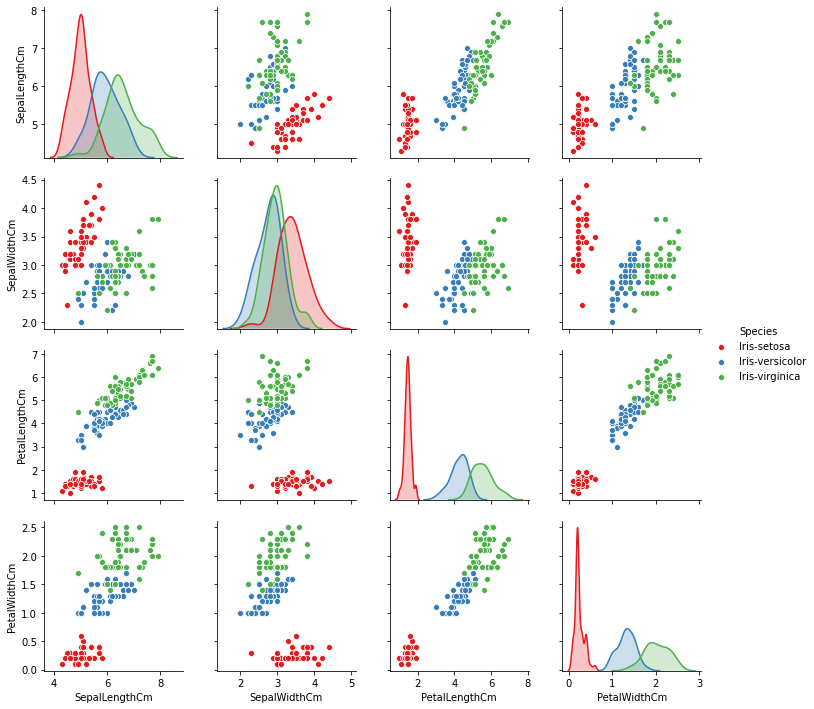

In [7]:
# Plotting pair plots
sns.pairplot(df1,hue='Species',palette='Set1')

### Label Encoding

In [8]:
# Label Encoding for target variable
df2 = df.drop('Species',1)
y = df.iloc[:,-1].values
encode = LabelEncoder()
y = encode.fit_transform(y)

### Splitting Data

In [9]:
xtr,xts,ytr,yts = train_test_split(df2,y,test_size=0.25, random_state=0)

<hr>

### Defining Decision Tree Algorithm

In [10]:
# Decision tree Algorithm
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(df2,y)

DecisionTreeClassifier(random_state=0)

### Predicting

In [11]:
pred = dtree.predict(xts)
print('Prediction accuracy percentage of the model is', accuracy_score(yts,pred)*100,'%')

Prediction accuracy percentage of the model is 100.0 %


### Accuracy of the model is 100.0 %

In [12]:
anp = pd.DataFrame({'Actual':yts, 'Predicted': pred})
anp.sample(5)

,Actual,Predicted
5,2,2
26,0,0
37,1,1
30,2,2
11,1,1


## Evaluating The Model

In [13]:
cm = confusion_matrix(yts,pred)
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]], dtype=int64)

In [14]:
print(classification_report(yts,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### It can be seen that accuracy, precision, recall and f1-score are all 100 %

<hr>

### Visualizing the Decision Tree

[Text(223.2, 271.8, 'X[4] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(111.6, 163.08, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(334.79999999999995, 163.08, 'X[0] <= 100.5\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(223.2, 54.360000000000014, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(446.4, 54.360000000000014, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]')]

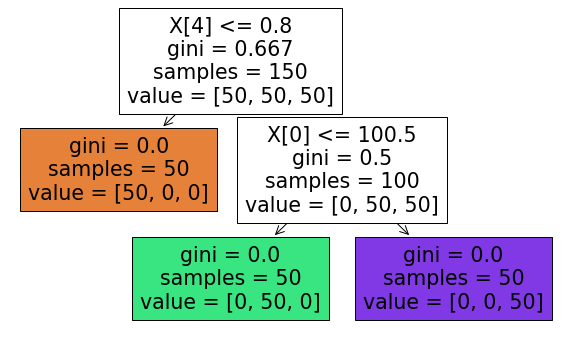

In [15]:
plt.figure(figsize=(10,6))
plot_tree(dtree, filled = True)